# Importing Libraries Initial Libraires

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data Sets

In [328]:
customer = pd.read_csv('customer_features.csv')
customer.head()

,customer_id,age_bucket,is_returning_customer,favorite_genres
0,1000078,46-55,True,"['Classic', 'History', 'Self-Help', 'Romance',..."
1,1000102,46-55,True,"['Beach-Read', 'Pop-Sci', 'Pop-Psychology', 'B..."
2,1000185,46-55,True,"['Romance', 'Self-Help', 'Beach-Read', 'Pop-Ps..."
3,1000423,26-35,True,"['Classic', 'Drama']"
4,1000696,66+,True,"['Drama', 'Thriller', 'Sci-Fi', 'Romance', 'Hi..."


In [329]:
last_month = pd.read_csv('last_month_assortment.csv')
last_month.head()

,customer_id,product_id,purchased
0,1000078,1730073,False
1,1000078,1470520,False
2,1000078,1861356,False
3,1000078,1240824,True
4,1000078,1155460,False


In [330]:
next_month = pd.read_csv('next_month_assortment.csv')
next_month.head()

,customer_id,product_id
0,1600785,1443029
1,1600785,1164138
2,1600785,1636511
3,1600785,1832547
4,1600785,1237420


In [331]:
next_order = pd.read_csv('next_purchase_order.csv')
next_order.head()

,product_id,quantity_purchased,cost_to_buy,retail_value
0,1479507,39,1.82,12.68
1,1681385,55,1.73,12.88
2,1771749,37,1.26,10.38
3,1605149,49,1.47,11.27
4,1861356,34,1.98,10.41


In [332]:
original_order = pd.read_csv('original_purchase_order.csv')
original_order.head()

,product_id,quantity_purchased,cost_to_buy,retail_value
0,1769808,77,2.20,16.67
1,1896283,67,1.46,9.59
2,1889979,80,2.06,13.36
3,1341288,85,1.25,6.57
4,1666328,60,1.51,10.49


In [333]:
prod_features = pd.read_csv('product_features.csv')
prod_features.head()

,product_id,length,difficulty,fiction,genre
0,1769808,148,3,False,Self-Help
1,1896283,161,5,False,Biography
2,1889979,296,4,False,History
3,1341288,551,4,True,Thriller
4,1666328,623,-1,True,Sci-Fi


# Data Cleaning

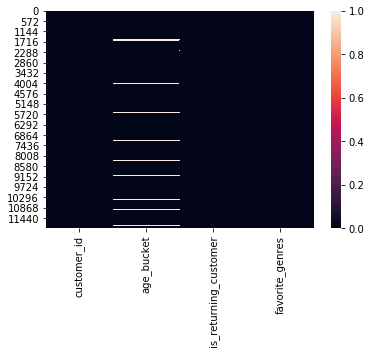

In [334]:
sns.heatmap(customer.isnull())
plt.show()

WE CAN CLEARLY SEE THAT THERE ARE NULL VALUES IN THE AGE_BUCKET COLUMN, BUT WE DONT NEED THE AGE COLUMN, BECAUSE WHEN WE SELECT A PARTICULAR GENRE THE BOOKS MIGHT BE SEPARTED W.R.T THE AGE, LIKE FOR KIDS AND FOR ADULTS BUT BOTH THE BOOKS COME UNDER THE SAME GENRE, AND THE FAVOURITE GENRE'S HAS THE SAME, SO WE CAN REMOVE THE COLUMN.

In [335]:
customer.drop('age_bucket',axis=1,inplace = True)

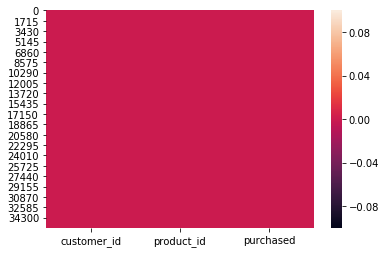

In [336]:
sns.heatmap(last_month.isnull())
plt.show()

NO NULL VALUES IN THE LAST MONTH TABLE

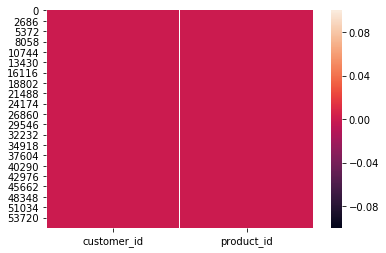

In [337]:
sns.heatmap(next_month.isnull())
plt.show()

NO NULL VALUES IN THE NEXT MONTH TABLE

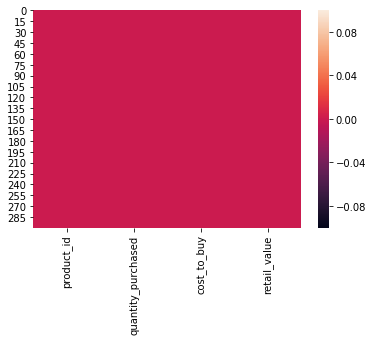

In [338]:
sns.heatmap(next_order.isnull())
plt.show()

NO NULL VALUES IN THE NEXT ORDER TABLE

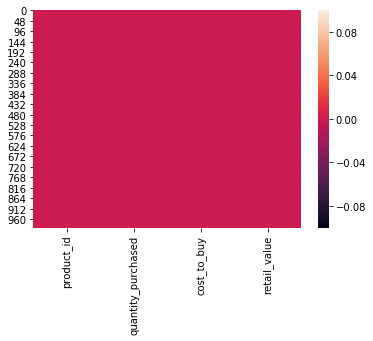

In [339]:
sns.heatmap(original_order.isnull())
plt.show()

NO NULL VALUES IN THE ORIGINAL ORDER TABLE

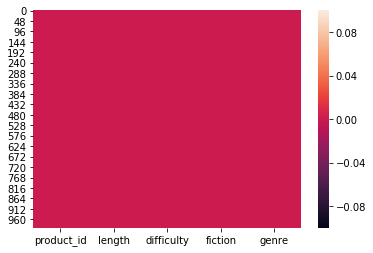

In [340]:
sns.heatmap(prod_features.isnull())
plt.show()

NO NULL VALUES IN THE PRODUCT FEATURES TABLE

# Merging the data sets to create train data

In [573]:
customer_last_month = pd.merge(customer,last_month,on='customer_id',how='inner')
customer_last_month.head()

,customer_id,is_returning_customer,favorite_genres,product_id,purchased
0,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1730073,False
1,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1470520,False
2,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1861356,False
3,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1240824,True
4,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1155460,False


In [575]:
customer_last_month_features = pd.merge(customer_last_month,prod_features,on='product_id',how='inner')
customer_last_month_features.head()

,customer_id,is_returning_customer,favorite_genres,product_id,purchased,length,difficulty,fiction,genre
0,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1730073,False,219,4,True,Drama
1,1004863,True,"['Biography', 'Thriller', 'Pop-Psychology', 'R...",1730073,False,219,4,True,Drama
2,1023962,True,"['Thriller', 'History', 'Drama', 'Biography', ...",1730073,False,219,4,True,Drama
3,1051139,True,"['History', 'Sci-Fi', 'Pop-Psychology', 'Roman...",1730073,False,219,4,True,Drama
4,1083822,False,"['Biography', 'Thriller', 'Pop-Psychology', 'R...",1730073,False,219,4,True,Drama


In [577]:
customer_last_month_features.drop(['favorite_genres','genre'],axis = 1,inplace = True)

In [578]:
train = customer_last_month_features.copy()

In [579]:
train.head()

,customer_id,is_returning_customer,product_id,purchased,length,difficulty,fiction
0,1000078,True,1730073,False,219,4,True
1,1004863,True,1730073,False,219,4,True
2,1023962,True,1730073,False,219,4,True
3,1051139,True,1730073,False,219,4,True
4,1083822,False,1730073,False,219,4,True


#  Data Visualization

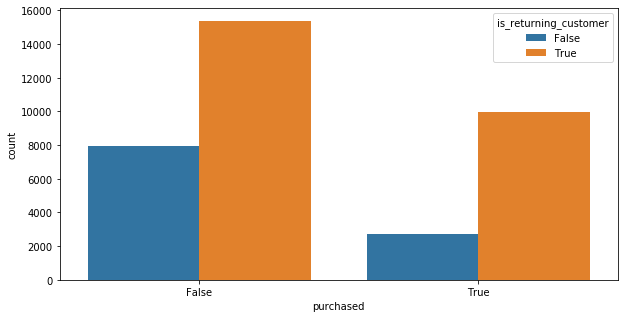

In [580]:
plt.figure(figsize=(10,5))
sns.countplot(train['purchased'],hue = train['is_returning_customer'])
plt.show()

SO WE CAN CLEARLY SEE THAT THERE ARE SOME RETURNING CUSTOMER'S WHO DIDNT BUY, SO WE CAN LOOK AT THAT DATA AND ALSO PROVIDE INSIGHTS ON WHICH CUSTOMER ISN'T INTERESTED IN WHAT GENRE AND WE CAN STOP SENDING THAT KIND OF BOOKS TO THAT CUSTOMER.

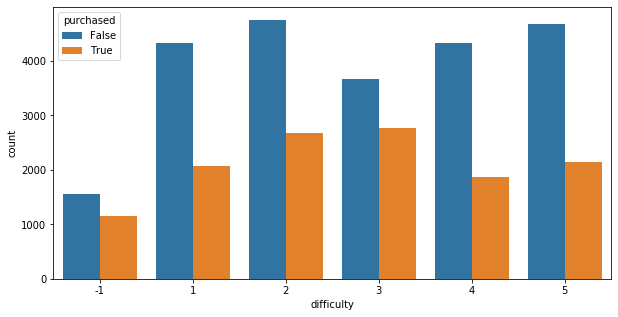

In [581]:
plt.figure(figsize=(10,5))
plot2 = sns.countplot(train['difficulty'],hue = train['purchased'])

CLEARLY, DIFFICULY 1,2,4,5 BOOKS ARE SOLD LESS IN NUMBER WHEN COMPARED TO THE OTHER DIFFICULTY LEVELS, SO WE CAN ALSO REDUCE THE NUMBER OF ORDER FOR THESE DIFFICULTY LEVEL BOOKS.

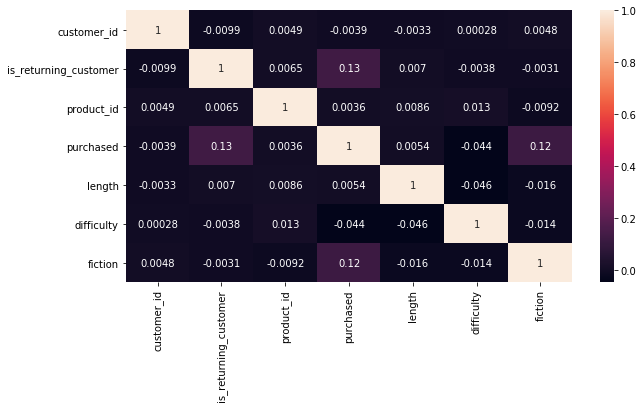

In [582]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),annot = True)
plt.show()

THERE ISN'T ANY STRONG CO-RELATION BETWEEN THE FEATURES 

# Converting categorical into numerical

In [583]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

WE HAVE THE OPTION TO CHOOSE BETWEEN LABEL ENCODER AND ONE HOT ENCODING, ONE HOT ENCODING IS USED ONLY WHEN WE KNOW THE ORDER OF THE CATEGORICAL DATA EX.HIGH,MEDIUM,LOW , AND LABEL ENCODER WHEN WE DON'T KNOW THE ORDER BUT WE JUST LABEL THEM, IT IS THE SAME CASE HERE THE CATEGORICAL VARIABLES HAVE NO SUCH ORDER AND SO WE USE LABEL ENCODING.

In [584]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 0 to 35999
Data columns (total 7 columns):
customer_id              36000 non-null int64
is_returning_customer    36000 non-null bool
product_id               36000 non-null int64
purchased                36000 non-null bool
length                   36000 non-null int64
difficulty               36000 non-null int64
fiction                  36000 non-null bool
dtypes: bool(3), int64(4)
memory usage: 2.7 MB


In [585]:
train['is_returning_customer'] = le1.fit_transform(train['is_returning_customer'])
train['purchased'] = le2.fit_transform(train['purchased'])
train['fiction'] = le3.fit_transform(train['fiction'])

# Model Building - Training Phase

In [586]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [587]:
X = train.drop('purchased',axis = 1)
y = train['purchased']

In [588]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [589]:
model1 = LogisticRegression()

In [590]:
model1.fit(X_train,y_train)

C:\Users\ummar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [591]:
model1.score(X_test,y_test)

0.649074074074074

In [592]:
from sklearn.metrics import confusion_matrix

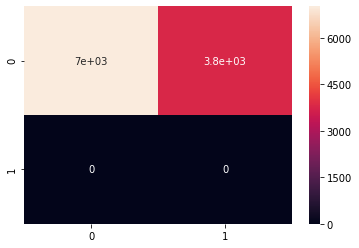

In [593]:
sns.heatmap(confusion_matrix(model1.predict(X_test),y_test),annot = True)
plt.show()

In [594]:
from sklearn.ensemble import ExtraTreesClassifier

In [595]:
model2 = ExtraTreesClassifier()

In [596]:
model2.fit(X_train,y_train)

C:\Users\ummar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [597]:
model2.score(X_test,y_test)

0.6818518518518518

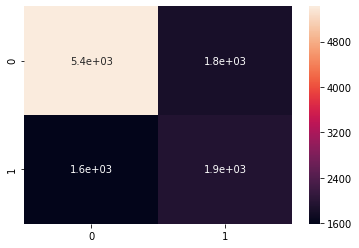

In [598]:
sns.heatmap(confusion_matrix(model2.predict(X_test),y_test),annot = True)
plt.show()

In [599]:
from sklearn.ensemble import RandomForestClassifier

In [600]:
model3 = RandomForestClassifier()

In [601]:
model3.fit(X_train,y_train)

C:\Users\ummar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [602]:
model3.score(X_test,y_test)

0.6949074074074074

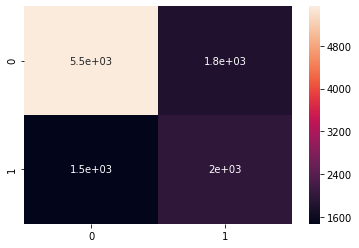

In [603]:
sns.heatmap(confusion_matrix(model3.predict(X_test),y_test),annot = True)
plt.show()

In [604]:
from xgboost import XGBClassifier

In [605]:
model4 = XGBClassifier()

In [606]:
model4.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [607]:
model4.score(X_test,y_test)

0.7564814814814815

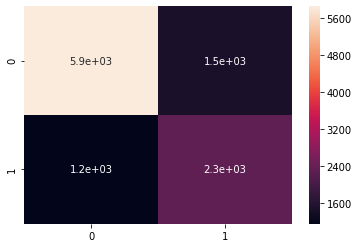

In [608]:
sns.heatmap(confusion_matrix(model4.predict(X_test),y_test),annot = True)
plt.show()

In [609]:
confusion_matrix(model4.predict(X_test),y_test)

array([[5857, 1477],
       [1153, 2313]], dtype=int64)

WE CAN SEE FROM ALL THE ABOVE MODELS THAT THE FPR,TPR FOR EACH MODEL IS GOOD FOR XGBOOST , SO WE ARE GOING TO STICK TO THAT MODEL.

# Final Model With All Records

In [610]:
final_model = XGBClassifier()

In [611]:
final_model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Test Data

In [612]:
customer_next_month = pd.merge(customer,next_month,on='customer_id',how='right')
customer_next_month.head()

,customer_id,is_returning_customer,favorite_genres,product_id
0,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1832547
1,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1880646
2,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1014973
3,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1650307
4,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1755017


In [615]:
customer_next_month_features = pd.merge(customer_next_month,prod_features,on='product_id',how='left')
customer_next_month_features.head()

,customer_id,is_returning_customer,favorite_genres,product_id,length,difficulty,fiction,genre
0,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1832547,268,2,True,Beach-Read
1,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1880646,905,1,False,Pop-Psychology
2,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1014973,743,4,False,Self-Help
3,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1650307,643,3,False,Biography
4,1000078,True,"['Classic', 'History', 'Self-Help', 'Romance',...",1755017,224,5,True,Drama


In [616]:
customer_next_month_features.drop(['favorite_genres','genre'],axis = 1,inplace = True)

In [617]:
final_test = customer_next_month_features.copy()

In [618]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56400 entries, 0 to 56399
Data columns (total 6 columns):
customer_id              56400 non-null int64
is_returning_customer    56400 non-null bool
product_id               56400 non-null int64
length                   56400 non-null int64
difficulty               56400 non-null int64
fiction                  56400 non-null bool
dtypes: bool(2), int64(4)
memory usage: 2.3 MB


In [619]:
final_test['is_returning_customer'] = le1.transform(final_test['is_returning_customer'])

In [620]:
final_test['fiction'] = le3.transform(final_test['fiction'])

In [621]:
final_test['purchased'] = final_model.predict(final_test)

In [622]:
final_test.head()

,customer_id,is_returning_customer,product_id,length,difficulty,fiction,purchased
0,1000078,1,1832547,268,2,1,0
1,1000078,1,1880646,905,1,0,0
2,1000078,1,1014973,743,4,0,0
3,1000078,1,1650307,643,3,0,1
4,1000078,1,1755017,224,5,1,0


# Predicting the revenue for previous month 

In [623]:
new_train = pd.merge(customer_last_month_features,original_order,on='product_id',how='left')

In [624]:
new_train.head()

,customer_id,is_returning_customer,product_id,purchased,length,difficulty,fiction,quantity_purchased,cost_to_buy,retail_value
0,1000078,True,1730073,False,219,4,True,81,1.74,10.21
1,1004863,True,1730073,False,219,4,True,81,1.74,10.21
2,1023962,True,1730073,False,219,4,True,81,1.74,10.21
3,1051139,True,1730073,False,219,4,True,81,1.74,10.21
4,1083822,False,1730073,False,219,4,True,81,1.74,10.21


In [625]:
returned_books = new_train[new_train['purchased'] == False]

In [626]:
purchased_books = new_train[new_train['purchased'] == True]

In [627]:
no_of_books_returned = returned_books.shape[0]

In [628]:
no_of_books_purchased = purchased_books.shape[0]

In [629]:
total_cost_to_transport = no_of_books_returned*1.2+no_of_books_purchased*0.6

In [630]:
loan_amount = sum(original_order['quantity_purchased']*original_order['cost_to_buy'])

In [631]:
returns = sum(purchased_books['retail_value'])

In [650]:
revenue = returns- total_cost_to_transport

In [651]:
print('The Total revenue for the previous month: {}'.format(revenue))

The Total revenue for the previous month: 116024.7599999976


In [656]:
print('The loan Amount for previous month :{}'.format(loan_amount))

The loan Amount for previous month :135546.42


# Predicting the revenue for the next month

In [634]:
final_test.head()

,customer_id,is_returning_customer,product_id,length,difficulty,fiction,purchased
0,1000078,1,1832547,268,2,1,0
1,1000078,1,1880646,905,1,0,0
2,1000078,1,1014973,743,4,0,0
3,1000078,1,1650307,643,3,0,1
4,1000078,1,1755017,224,5,1,0


In [635]:
not_purchased = final_test[final_test['purchased'] == 0]

In [636]:
purchased = final_test[final_test['purchased'] == 1]

In [637]:
no_not_purchased =not_purchased.shape[0]

In [638]:
no_purchased = purchased.shape[0]

In [639]:
new_total_cost_to_transport = no_not_purchased*1.2+no_purchased*0.6

In [640]:
new_loan_amount = sum(next_order['quantity_purchased']*next_order['cost_to_buy'])

In [643]:
new_test = pd.merge(purchased,original_order,on='product_id',how='left')

In [644]:
new_returns = sum(new_test['retail_value'])

In [653]:
new_revenue = new_returns- new_total_cost_to_transport

In [655]:
print('The Total revenue for the next month: {}'.format(new_revenue))

The Total revenue for the next month: 134991.21000000075


In [658]:
print('The loan Amount for next month :{}'.format(new_loan_amount))

The loan Amount for next month :24155.509999999984


# Conclusion

WE CAN CLEARLY SEE THAT THE REVENUE FOR PREVIOUS MONTH IS CLEARLY NOT ENOUGH FOR THE LOAN AMOUNT, BUT WHEN THE REVENUE IS COMBINED WITH THE NEXT MONTH'S REVENUE, IT HAS INCREASED AND ALSO WE CAN CLEAR NEXT MONTH'S LOAN AMOUNT AS WELL, WHICH WILL GIVE THE COMPANY, PROFITS.